In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('midcp.csv')

In [3]:
data

,time,MF_FUT,volume_FUT,oi,ltp_FUT,MF_EQ,volume_EQ,vol_clr,ltp_EQ,INSTRUMENT,...,octype,expiry,ltp,Symbol,Avgpr,MFCr,MFStus,MF,coidff,action
0,10:35:00,945.475814,26325,7310925.0,10685.70,4423.282377,4056468,#cc3300,10462.25,MIDCP,...,CE,2024-02-12,140.00,NFO:MIDCPNIFTY2421210700CE,140.000,0.000000,0.00,0.000000,NaN,NaN
1,10:36:00,932.569013,18075,7311825.0,10680.25,4442.313845,5370464,#cc3300,10706.70,MIDCP,...,CE,2024-02-12,140.00,NFO:MIDCPNIFTY2421210700CE,140.000,0.000000,0.00,0.000000,0.0,NaN
2,10:37:00,935.526740,10575,7327050.0,10682.45,4461.593637,4137467,#006400,10600.80,MIDCP,...,CE,2024-02-12,140.00,NFO:MIDCPNIFTY2421210700CE,140.000,0.000000,0.00,0.000000,0.0,NaN
3,10:38:00,940.271223,8175,7328475.0,10687.05,4469.506340,3787382,#cc3300,10666.05,MIDCP,...,CE,2024-02-12,140.00,NFO:MIDCPNIFTY2421210700CE,140.000,0.000000,0.00,0.000000,0.0,NaN
4,10:39:00,943.883043,10725,7328475.0,10685.15,4466.280085,4757873,#cc3300,10719.15,MIDCP,...,CE,2024-02-12,140.00,NFO:MIDCPNIFTY2421210700CE,140.000,0.000000,0.00,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32422,15:25:00,-40.047209,1575,815700.0,10755.15,9.592491,500244,#cc3300,10746.75,MIDCP,...,PE,2024-02-12,242.70,NFO:MIDCPNIFTY2421211000PE,240.850,0.045159,3.70,1.612364,0.0,NaN
32423,15:26:00,-39.563154,450,810450.0,10757.80,13.840931,386920,#006400,10752.30,MIDCP,...,PE,2024-02-12,241.00,NFO:MIDCPNIFTY2421211000PE,241.850,-0.001814,-1.70,1.610550,0.0,NaN
32424,15:27:00,-38.594934,900,810450.0,10759.45,20.915095,584236,#006400,10752.75,MIDCP,...,PE,2024-02-12,238.25,NFO:MIDCPNIFTY2421211000PE,239.500,-0.057480,-2.75,1.553070,-1950.0,Unwinding
32425,15:28:00,-37.223238,1275,810450.0,10759.65,18.536505,489545,#cc3300,10751.05,MIDCP,...,PE,2024-02-12,238.70,NFO:MIDCPNIFTY2421211000PE,239.075,0.032275,0.45,1.585345,0.0,NaN


In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
expirym  = '2024-2-12'
# mid_expiry_date = '2024-2-05'

mid_expiry_date = pd.to_datetime(expirym).strftime('%Y-%m-%d')
midexpirydate = pd.to_datetime(expirym).strftime('%Y%m%d')

In [6]:
def split_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df['expiry'] = pd.to_datetime(df['expiry'])
    df['Year'] = df.date.dt.year
    df['Month'] = df.date.dt.month
    df['Day'] = df.date.dt.day
    # Calculate the difference in days between 'expiry' and 'date'
    df['days_left'] = (df['expiry'] - df['date']).dt.days


In [7]:
def get_distance_ltp(Symbol, bnkexpirydate, ltp):
    if Symbol.startswith('NFO:MIDCP'):
        distance2 = Symbol[len('NFO:MIDCPNIFTY'):-2]
        distance = float(ltp) -float(distance2[len(str(bnkexpirydate))-3:])
        return distance
    else:
        return 0


In [8]:
data['distance_ltp'] = data.apply(lambda row: get_distance_ltp(row['Symbol'],  midexpirydate, row['ltp_EQ']), axis=1)
split_date(data)
# Assuming 'data' is your DataFrame
data.rename(columns={'oi': 'oi_FUT', 'volume': 'volume_OC', 'MF': 'MF_OC', 'ltp': 'ltp_OC'}, inplace=True)
data.columns

Index(['time', 'MF_FUT', 'volume_FUT', 'oi_FUT', 'ltp_FUT', 'MF_EQ',
       'volume_EQ', 'vol_clr', 'ltp_EQ', 'INSTRUMENT', 'type', 'date', 'open',
       'low', 'high', 'close', 'volume_OC', 'oi_OC', 'octype', 'expiry',
       'ltp_OC', 'Symbol', 'Avgpr', 'MFCr', 'MFStus', 'MF_OC', 'coidff',
       'action', 'distance_ltp', 'Year', 'Month', 'Day', 'days_left'],
      dtype='object')

In [9]:
data['Day'].unique()

array([29, 30, 31,  1,  2,  5,  6,  7,  8,  9])

In [10]:
# sel_col = ['date', 'time', 'Symbol', 'MF_FUT', 'oi_FUT', 'ltp_FUT', 'MF_EQ', 'volume_EQ', 'ltp_EQ', 'volume_FUT', 'oi_OC', 'ltp_OC', 'MF_OC', 'coidff', 'distance_ltp', 'octype', 'expiry']
# sel_col2 = ['MF_FUT', 'oi_FUT', 'ltp_FUT', 'MF_EQ', 'volume_EQ', 'ltp_EQ', 'volume_FUT', 'oi_OC', 'ltp_OC', 'MF_OC', 'coidff', 'distance_ltp', 'days_left']
# sel_data = data[sel_col]
# split_date(sel_data)
# sel_data

In [12]:
# sel_data.loc[:, 'date'] = pd.to_datetime(sel_data['date'])
# sel_data.sort_values(by=['date', 'time'], inplace=True)
data.sort_values(by=['date', 'time'], inplace=True)
# train_df, val_df, test_df = data[[Day != 8]], data[Day == 8], data[Day == 9]
# data.info()
# train_df = data[(data['Day'] != 8) & (data['Day'] != 9)]
train_df = data[data['Day'] != 8]
test_df = data[data['Day'] == 9]

# data['Day'].shape

In [13]:
f'train : {train_df.shape} and test set : {test_df.shape}'

'train : (26427, 33) and test set : (6000, 33)'

In [14]:
data_ce = data[data.octype == 'CE'].copy()
data_pe = data[data.octype == 'PE'].copy()

In [15]:
# data_pe[sel_col2].corr()

In [16]:
# data_ce[sel_col2].corr()

In [17]:
f'{data_ce.shape} and {data_pe.shape}'

'(17240, 33) and (15187, 33)'

In [18]:
# data[sel_col2].corr()

In [19]:
data.columns

Index(['time', 'MF_FUT', 'volume_FUT', 'oi_FUT', 'ltp_FUT', 'MF_EQ',
       'volume_EQ', 'vol_clr', 'ltp_EQ', 'INSTRUMENT', 'type', 'date', 'open',
       'low', 'high', 'close', 'volume_OC', 'oi_OC', 'octype', 'expiry',
       'ltp_OC', 'Symbol', 'Avgpr', 'MFCr', 'MFStus', 'MF_OC', 'coidff',
       'action', 'distance_ltp', 'Year', 'Month', 'Day', 'days_left'],
      dtype='object')

In [20]:
num_col = ['MF_FUT', 'oi_FUT', 'ltp_FUT', 'MF_EQ', 'volume_EQ', 'volume_FUT', 'oi_OC', 'ltp_OC', 'MF_OC', 'coidff', 'distance_ltp', 'days_left', 'Month', 'Day']
# cat_col = ['Symbol', 'octype', 'action']
cat_col = ['octype', 'action']
cat_col_type = ['Symbol', 'INSTRUMENT', 'type', 'action']
target_col = 'ltp_EQ'

In [21]:
train_inputs = train_df[num_col + cat_col].copy()
train_targets = train_df.loc[:, 'ltp_EQ'].copy()

test_inputs = test_df[num_col + cat_col].copy()
test_targets = test_df.loc[:, 'ltp_EQ'].copy()


# inputs_ce = data_ce[num_col + cat_col_type].copy()
# targets_ce = data_ce.loc[:, 'ltp_EQ'].copy()

# inputs_pe = data_pe[num_col + cat_col_type].copy()
# targets_pe = data_pe.loc[:, 'ltp_EQ'].copy()

In [22]:
f'input train: {train_inputs.shape} | targets : {train_targets.shape} and input test: {test_inputs.shape} | targets : {test_targets.shape}'


'input train: (26427, 16) | targets : (26427,) and input test: (6000, 16) | targets : (6000,)'

In [23]:
# f'input ce : {inputs_ce.shape} | targets ce : {targets_ce.shape}'
# 

In [24]:
# f'input pe : {inputs_pe.shape} | targets pe : {targets_pe.shape}'

In [25]:
# inputs[num_col].isna().sum()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
imputer = SimpleImputer(strategy='constant', fill_value=0)
imputer.fit(data[num_col])

SimpleImputer(fill_value=0, strategy='constant')

In [26]:
list(imputer.statistics_)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [27]:
# inputs['coidff'].fillna(0, inplace = True)
data[num_col].isna().sum()

MF_FUT            0
oi_FUT            0
ltp_FUT           0
MF_EQ             0
volume_EQ         0
volume_FUT        0
oi_OC             0
ltp_OC            0
MF_OC             0
coidff          110
distance_ltp      0
days_left         0
Month             0
Day               0
dtype: int64

In [28]:
# Impute missing numerical values
train_inputs[num_col] = imputer.transform(train_inputs[num_col])
test_inputs[num_col] = imputer.transform(test_inputs[num_col])

In [29]:
test_inputs[num_col].isna().sum()

MF_FUT          0
oi_FUT          0
ltp_FUT         0
MF_EQ           0
volume_EQ       0
volume_FUT      0
oi_OC           0
ltp_OC          0
MF_OC           0
coidff          0
distance_ltp    0
days_left       0
Month           0
Day             0
dtype: int64

In [30]:
# train_inputs.loc[:, 'Year'].fillna(2024, inplace=True)
# train_inputs

In [31]:
# Scale numeric features
scaler = MinMaxScaler().fit(data[num_col])
train_inputs[num_col] = scaler.transform(train_inputs[num_col])
test_inputs[num_col] = scaler.transform(test_inputs[num_col])

In [32]:
train_inputs[num_col].corr()

,MF_FUT,oi_FUT,ltp_FUT,MF_EQ,volume_EQ,volume_FUT,oi_OC,ltp_OC,MF_OC,coidff,distance_ltp,days_left,Month,Day
MF_FUT,1.000000,0.773181,-0.009957,0.042915,0.483366,0.309855,-0.384853,0.229787,-0.056187,-0.026252,0.238746,0.845551,-0.437162,0.057946
oi_FUT,0.773181,1.000000,-0.009600,-0.109755,0.636699,0.408091,-0.587823,0.272402,-0.140475,-0.038792,0.361964,0.974012,-0.442051,-0.003226
ltp_FUT,-0.009957,-0.009600,1.000000,0.087603,0.373780,0.185993,-0.029522,-0.008015,-0.014602,0.025968,0.085331,-0.008476,-0.012326,0.018422
MF_EQ,0.042915,-0.109755,0.087603,1.000000,0.092703,0.030124,0.238762,0.027621,0.070060,0.015103,-0.077590,-0.022501,-0.767253,0.884294
volume_EQ,0.483366,0.636699,0.373780,0.092703,1.000000,0.561083,-0.362585,0.240978,-0.085378,-0.009756,0.233796,0.640541,-0.372545,0.090954
volume_FUT,0.309855,0.408091,0.185993,0.030124,0.561083,1.000000,-0.241901,0.141347,-0.058459,0.004221,0.155917,0.403375,-0.206762,0.025609
oi_OC,-0.384853,-0.587823,-0.029522,0.238762,-0.362585,-0.241901,1.000000,-0.504169,-0.066188,0.056417,-0.242553,-0.535251,0.116413,0.145652
ltp_OC,0.229787,0.272402,-0.008015,0.027621,0.240978,0.141347,-0.504169,1.000000,0.104972,-0.053516,0.103311,0.261941,-0.153640,0.038664
MF_OC,-0.056187,-0.140475,-0.014602,0.070060,-0.085378,-0.058459,-0.066188,0.104972,1.000000,-0.048720,0.038480,-0.121561,0.018075,0.042591
coidff,-0.026252,-0.038792,0.025968,0.015103,-0.009756,0.004221,0.056417,-0.053516,-0.048720,1.000000,-0.014664,-0.036220,0.009114,0.008450


In [33]:
# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[cat_col])
encoded_cols = list(encoder.get_feature_names_out(cat_col))
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_col])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_col])

D:\pjobs\v1\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
train_inputs.columns

Index(['MF_FUT', 'oi_FUT', 'ltp_FUT', 'MF_EQ', 'volume_EQ', 'volume_FUT',
       'oi_OC', 'ltp_OC', 'MF_OC', 'coidff', 'distance_ltp', 'days_left',
       'Month', 'Day', 'octype', 'action', 'octype_CE', 'octype_PE',
       'action_Long', 'action_Short', 'action_Short Covering',
       'action_Unwinding', 'action_nan'],
      dtype='object')

In [35]:
X = train_inputs[num_col + encoded_cols]
X_test = test_inputs[num_col + encoded_cols]

In [36]:
X.head()

,MF_FUT,oi_FUT,ltp_FUT,MF_EQ,volume_EQ,volume_FUT,oi_OC,ltp_OC,MF_OC,coidff,...,days_left,Month,Day,octype_CE,octype_PE,action_Long,action_Short,action_Short Covering,action_Unwinding,action_nan
60,0.608521,0.945599,0.971918,0.910449,1.0,0.368209,0.0,0.000272,0.308785,0.502871,...,1.0,0.0,0.933333,0.0,1.0,0.0,0.0,0.0,0.0,1.0
61,0.608521,0.945599,0.971918,0.910449,1.0,0.368209,0.0,0.000000,0.308785,0.502871,...,1.0,0.0,0.933333,1.0,0.0,0.0,0.0,0.0,0.0,1.0
62,0.608521,0.945599,0.971918,0.910449,1.0,0.368209,0.0,1.000000,0.308785,0.502871,...,1.0,0.0,0.933333,0.0,1.0,0.0,0.0,0.0,0.0,1.0
63,0.608521,0.945599,0.971918,0.910449,1.0,0.368209,0.0,0.000018,0.308785,0.502871,...,1.0,0.0,0.933333,0.0,1.0,0.0,0.0,0.0,0.0,1.0
64,0.608521,0.945599,0.971918,0.910449,1.0,0.368209,0.0,0.000254,0.308785,0.502871,...,1.0,0.0,0.933333,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
from xgboost import XGBRegressor

In [38]:
?XGBRegressor

Init signature:
XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    v

In [39]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [41]:
%%time
model.fit(X, train_targets)

CPU times: total: 234 ms
Wall time: 1.4 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
preds = model.predict(X)

In [43]:
preds.shape

(26427,)

In [44]:
test_predict = model.predict(X_test)

In [45]:
test_predict

array([10807.773, 10816.839, 10823.479, ..., 10745.594, 10730.562,
       10744.873], dtype=float32)

In [46]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [47]:
rmse(preds, train_targets)

31.906886392020816

In [48]:
rmse(test_predict, test_targets)

12.517716744693528

In [49]:
importance_df_test = pd.DataFrame({
    'feature': X_test.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [51]:
importance_df_test

,feature,importance
3,MF_EQ,0.307005
13,Day,0.305404
10,distance_ltp,0.073195
11,days_left,0.065787
20,action_nan,0.054973
14,octype_CE,0.045908
0,MF_FUT,0.038951
6,oi_OC,0.028742
7,ltp_OC,0.024393
1,oi_FUT,0.024204


In [52]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

In [53]:
# plot_tree(model, rankdir='LR');
# plot_tree(model, rankdir='LR', num_trees=1);

In [54]:
trees = model.get_booster().get_dump()

In [55]:
len(trees)

20

In [56]:
# print(trees[9])

In [57]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [58]:
importance_df.head(40)

,feature,importance
3,MF_EQ,0.307005
13,Day,0.305404
10,distance_ltp,0.073195
11,days_left,0.065787
20,action_nan,0.054973
14,octype_CE,0.045908
0,MF_FUT,0.038951
6,oi_OC,0.028742
7,ltp_OC,0.024393
1,oi_FUT,0.024204


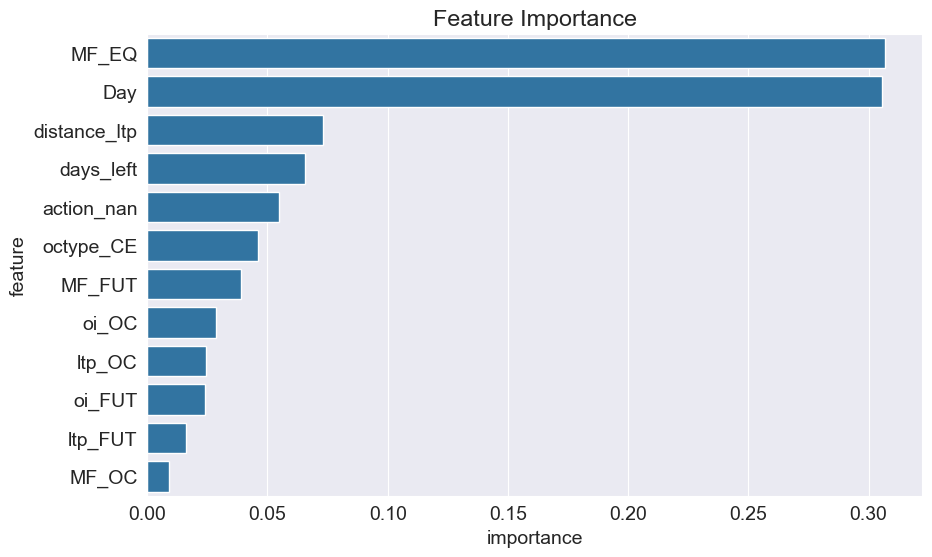

In [59]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(12), x='importance', y='feature');

In [60]:
from sklearn.model_selection import KFold

In [61]:
def train_and_evaluate(X, train_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X, train_targets)
    train_rmse = rmse(model.predict(X), train_targets)
    return model, train_rmse

In [62]:
kfold = KFold(n_splits=5)

In [63]:
models = []

for train_idxs in kfold.split(X):
    model, train_rmse = train_and_evaluate(X, train_targets, max_depth=4, n_estimators=20)
    models.append(model)
    print('Train RMSE: {}'.format(train_rmse))

Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816


In [64]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [65]:
preds = predict_avg(models, X)

In [66]:
preds

array([10441.904, 10482.647, 10508.087, ..., 10745.594, 10730.562,
       10744.873], dtype=float32)

In [67]:
def test_params_kfold(n_splits, **params):
    train_rmses, models = [], []
    kfold = KFold(n_splits)
    for train_idxs in kfold.split(X):
        model, train_rmse = train_and_evaluate(X, train_targets, max_depth=4, n_estimators=20)
        models.append(model)
        print('Train RMSE: {}'.format(train_rmse))
    return models

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
test_params_kfold(n_splits=8, n_estimators=500, max_depth=4)

Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816
Train RMSE: 31.906886392020816


[XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metri

In [70]:
?XGBRegressor

Init signature:
XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    v